# Internal Lab 



# Multiple Linear Regression

## Problem Statement

Use Multiple Linear Regression to **predict the consumption of petrol** given relevant variables are the petrol tax, the per capita, income, the number of miles of paved highway, and the proportion of the population with driver's licenses.

## Dataset

There are 48 rows of data.  The data include:

      I,  the index;
      A1, the petrol tax;
      A2, the per capita income;
      A3, the number of miles of paved highway;
      A4, the proportion of drivers;
      B,  the consumption of petrol.

### Reference 

    Helmut Spaeth,
    Mathematical Algorithms for Linear Regression,
    Academic Press, 1991,
    ISBN 0-12-656460-4.

    S Weisberg,
    Applied Linear Regression,
    New York, 1980, pages 32-33.

## Question 1 - Exploratory Data Analysis

*Read the dataset given in file named **'petrol.csv'**. Check the statistical details of the dataset.*

**Hint:** You can use **df.describe()**

In [647]:
#importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [648]:
#load the dataset
petrol_df = pd.read_csv('petrol.csv')
petrol_df.head()

,tax,income,highway,dl,consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


In [649]:
#get the info of the dataset
petrol_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 5 columns):
tax             48 non-null float64
 income         48 non-null int64
 highway        48 non-null int64
 dl             48 non-null float64
 consumption    48 non-null int64
dtypes: float64(2), int64(3)
memory usage: 2.0 KB


In [650]:
#checking for null values if any
petrol_df.isnull().sum()

tax             0
 income         0
 highway        0
 dl             0
 consumption    0
dtype: int64

In [651]:
#statistical inference
petrol_df.describe().T

,count,mean,std,min,25%,50%,75%,max
tax,48.0,7.668333,0.950770,5.000,7.00000,7.5000,8.12500,10.000
income,48.0,4241.833333,573.623768,3063.000,3739.00000,4298.0000,4578.75000,5342.000
highway,48.0,5565.416667,3491.507166,431.000,3110.25000,4735.5000,7156.00000,17782.000
dl,48.0,0.570333,0.055470,0.451,0.52975,0.5645,0.59525,0.724
consumption,48.0,576.770833,111.885816,344.000,509.50000,568.5000,632.75000,968.000


# Question 2 - Cap outliers 

Find the outliers and cap them. (Use (Q1 - 1.5 * IQR) as the minimum cap and (Q3 + 1.5 * IQR) as the max cap. The decision criteria is you should consider the datapoints which only falls within this range. The data points which fall outside this range are outliers and the entire row needs to be removed

In [652]:
# finding the IQR for all the columns in the dataset
Q1 = petrol_df.quantile(0.25) 
Q3 = petrol_df.quantile(0.75) 
IQR = Q3 - Q1

print(IQR)

tax                1.1250
 income          839.7500
 highway        4045.7500
 dl                0.0655
 consumption     123.2500
dtype: float64


In [653]:
#fetching the records with the data withing the minumum and maximum cap
petrol_df = petrol_df[(petrol_df > (Q1 - 1.5 * IQR)) & (petrol_df < (Q3 + 1.5 * IQR))]
petrol_df.head(10)

,tax,income,highway,dl,consumption
0,9.0,3571,1976.0,0.525,541.0
1,9.0,4092,1250.0,0.572,524.0
2,9.0,3865,1586.0,0.580,561.0
3,7.5,4870,2351.0,0.529,414.0
4,8.0,4399,431.0,0.544,410.0
5,NaN,5342,1333.0,0.571,457.0
6,8.0,5319,11868.0,0.451,344.0
7,8.0,5126,2138.0,0.553,467.0
8,8.0,4447,8577.0,0.529,464.0
9,7.0,4512,8507.0,0.552,498.0


In [654]:
#above step was able to place NaN for the values falling outside the minimum and the maximum cap
#we are now dropping the datapoints which are outside the required caps
petrol_df.dropna(inplace=True)

#checking the number of rows affected
print("Shape of the dataset =", petrol_df.shape)

#confirming if the dataset has no missing values
petrol_df.isna().sum()

Shape of the dataset = (43, 5)


tax             0
 income         0
 highway        0
 dl             0
 consumption    0
dtype: int64

# Question 3 - Independent variables and collinearity 
Which attributes seems to have stronger association with the dependent variable consumption?

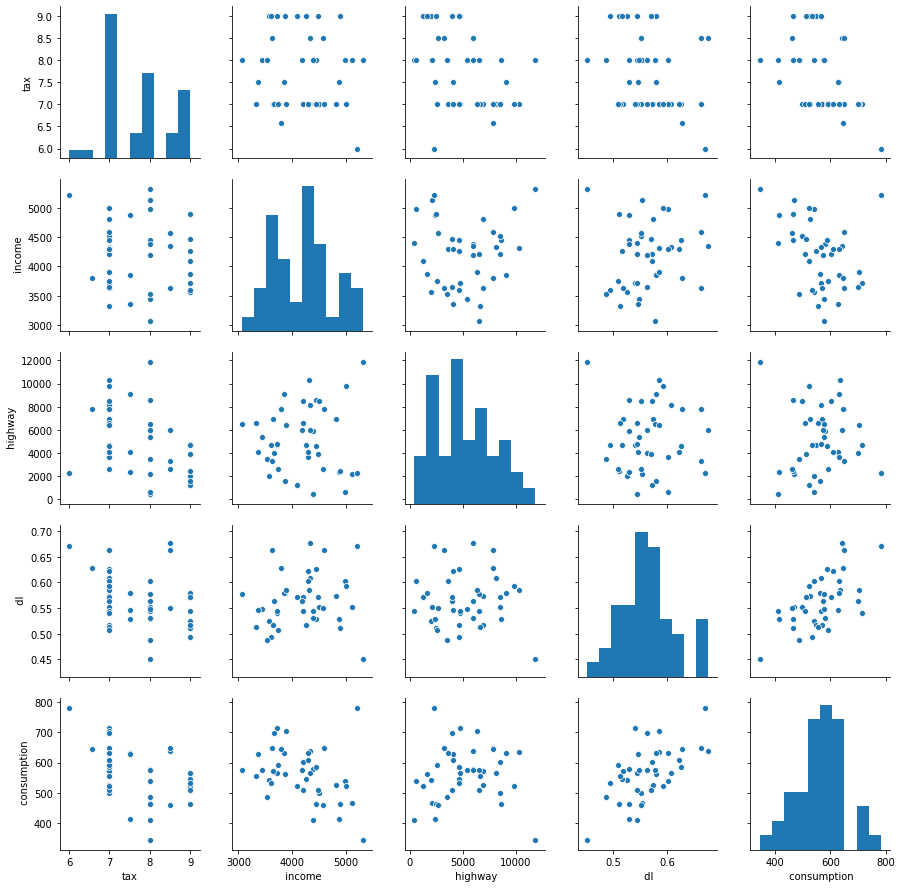

In [408]:
# visually looking at the relationship of the features
sns.pairplot(petrol_df)
plt.show()

In [655]:
#checking the correlation of the features
petrol_df.corr()

,tax,income,highway,dl,consumption
tax,1.000000,-0.109537,-0.390602,-0.314702,-0.446116
income,-0.109537,1.000000,0.051169,0.150689,-0.347326
highway,-0.390602,0.051169,1.000000,-0.016193,0.034309
dl,-0.314702,0.150689,-0.016193,1.000000,0.611788
consumption,-0.446116,-0.347326,0.034309,0.611788,1.000000


In [656]:
# with the corr of 0.61, could infer there is a relationship between drives and the consumption
# with the corr of -0.45, could infer there is a relationship between tax and the consumption, and seemingly negative in nature

### Observing the above correlation values between all the variables, we can see that there is stronger association between the number of drivers and consumption. And comparatively tax has an association in a negative way. 
Insights :
As tax increases the consumption decreases.
As number of drivers is more consumption is more

# Question 4 - Transform the dataset 
Divide the data into feature(X) and target(Y) sets.

In [657]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler() 
#petrol_df = pd.DataFrame(scaler.fit_transform(petrol_df), columns = petrol_df.columns)
#petrol_df.head()

In [658]:
#feature data 
X = petrol_df[['tax', ' dl']]

print(X.shape)

X.head(5)

(43, 2)


,tax,dl
0,9.0,0.525
1,9.0,0.572
2,9.0,0.580
3,7.5,0.529
4,8.0,0.544


In [659]:
#target data
y = petrol_df[' consumption']

print(y.shape)
y.head(5)

(43,)


0    541.0
1    524.0
2    561.0
3    414.0
4    410.0
Name:  consumption, dtype: float64

# Question 5 - Split data into train, test sets 
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature sets.

In [660]:
#import library to from sklearn to split data
from sklearn.model_selection import train_test_split

In [661]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

In [662]:
print("Shape of feature training data =", X_train.shape)
print("Shape of feature test data =", X_test.shape)
print("Shape of target training data =",  y_train.shape)
print("Shape of target test data =", y_test.shape)

Shape of feature training data = (34, 2)
Shape of feature test data = (9, 2)
Shape of target training data = (34,)
Shape of target test data = (9,)


# Question 6 - Build Model 
Estimate the coefficients for each input feature. Construct and display a dataframe with coefficients and X.columns as columns

In [663]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [664]:
# get the coefficeint of each of the individual attributes
coeff_df = pd.DataFrame({'Columns' :X.columns, 'Coefficient' : regression_model.coef_})  
coeff_df

,Columns,Coefficient
0,tax,-29.645853
1,dl,812.449191


In [665]:
# inercept for the model
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 339.5776215940583


In [666]:
# linear model is 
# y= 339 -29.65X1 + 812.45X2

# R-Square 

# Question 7 - Evaluate the model 
Calculate the accuracy score for the above model.

In [667]:
#predicting the values
y_pred = regression_model.predict(X_test)
y_pred

array([548.84308469, 547.63295325, 559.81969111, 547.01934518,
       587.64180473, 551.6951992 , 544.38315648, 621.96351188,
       572.00642898])

In [668]:
# r2 score for the model
regression_model.score(X_test, y_test)

0.21832403660860134

In [669]:
#comparing the actual vs the predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
31,554.0,548.843085
26,577.0,547.632953
28,574.0,559.819691
3,414.0,547.019345
27,631.0,587.641805
7,467.0,551.695199
4,410.0,544.383156
42,632.0,621.963512
32,577.0,572.006429


In [670]:
#evaluate the performance of the algorithm
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 51.0211362479351
Mean Squared Error: 5113.550446736887
Root Mean Squared Error: 71.5090934548669


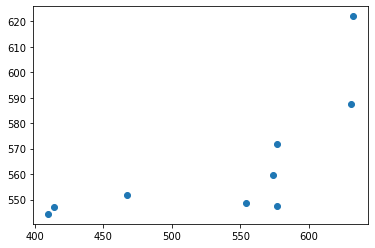

In [671]:
# plot the predicted y value vs actual y values for the test data
plt.scatter(y_test, y_pred)
plt.show()

# Question 8: Repeat the same Multi linear regression modelling by adding both Income and Highway features
Find R2 


In [672]:
X = petrol_df.drop(' consumption', axis=1)

In [673]:
y = petrol_df[' consumption']

In [674]:
# Split X and y into training and test set in 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7)

In [675]:
print("Shape of feature training data =", X_train.shape)
print("Shape of feature test data =", X_test.shape)
print("Shape of target training data =",  y_train.shape)
print("Shape of target test data =", y_test.shape)

Shape of feature training data = (34, 4)
Shape of feature test data = (9, 4)
Shape of target training data = (34,)
Shape of target test data = (9,)


In [676]:
# invoke the LinearRegression function and find the bestfit model on training data

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Question 9: Print the coefficients of the multilinear regression model

In [677]:
# get the coefficeint of each of the individual attributes
coeff_df = pd.DataFrame({'Columns' :X.columns, 'Coefficient' : regression_model.coef_})  
coeff_df

,Columns,Coefficient
0,tax,-34.259679
1,income,-0.065777
2,highway,-0.003094
3,dl,1072.385418


In [678]:
# itercept for the model

intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))

The intercept for our model is 511.6303833987672


In [679]:
#linear model is 
# Y = 511.63 - 34.26X1 -0.07X2 -0.003X3 + 1072.39X4

In [680]:
#evaluate the R-square
regression_model.score(X_test, y_test)

0.386658282425735

In [681]:
#predicting the values
y_pred = regression_model.predict(X_test)
y_pred

array([463.13699545, 553.4988708 , 584.20817675, 502.33865346,
       543.66979634, 549.06893501, 591.72016139, 656.44790201,
       636.12838075])

In [682]:
#comparing the actual vs the predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
23,547.0,463.136995
21,540.0,553.498871
15,635.0,584.208177
24,460.0,502.338653
1,524.0,543.669796
12,525.0,549.068935
17,714.0,591.720161
20,649.0,656.447902
40,587.0,636.128381


In [683]:
#evaluate the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 45.898578309124304
Mean Squared Error: 3330.58182458772
Root Mean Squared Error: 57.71119323482854


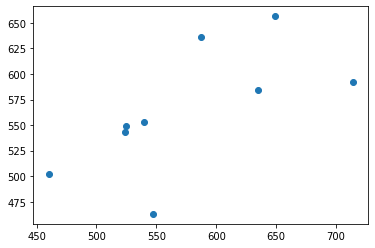

In [684]:
# plot the predicted y value vs actual y values for the test data
plt.scatter(y_test, y_pred)
plt.show()

# Question 10 
In one or two sentences give reasoning on R-Square on the basis of above findings
Answer

In [620]:
#R2 score of the model was 21.8% with having the dl and tax features. 
#R2 score improved to 38% when all the features where included in the model building.
#This model has an increase in the R2 score when the other features are included.

In [685]:
#also the from the plot can infer that points are not close enough to actual leading to less R2 whic may infer the model
#predicted is not good enough
#model should have performed better if the dataset had more values
